# Анализ бизнес-метрик приложения

## Цели и задачи исследования

Цель исследования - выявить причины убытков рекламных кампаний приложения Procrastinate Pro+, разработать рекомендации для повышения эффективности маркетинга.

Имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- `visits_info_short.csv` - журнал пользовательских сессий,
- `orders_info_short.csv` - данные о покупках за этот период,
- `costs_info_short.csv` - данные о расходах на рекламу.

Задачи исследования.

- выяснить, откуда приходят пользователи и какими устройствами они пользуются,
- оценить, сколько стоит привлечение пользователей из различных рекламных каналов;
- рассчитать, сколько денег приносит каждый клиент,
- определить, когда расходы на привлечение клиента окупаются,
- выявить факторы, мешающие привлечению клиентов.

## Подготовка данных

Подключим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Считаем имеющиеся файлы.

In [2]:
try:
    visits = pd.read_csv('datasets//visits_info_short.csv')
    orders = pd.read_csv('datasets//orders_info_short.csv')
    costs = pd.read_csv('datasets//costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

Изучим общую информацию о данных.

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.head(3)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


Данные о посещениях имеют 309901 запись. Явные пропуски отсутствуют.

Структура файла:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
orders.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


В данных о покупках имееются 40212 записей. Явные пропуски отсутствуют.

Структура файла:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [8]:
costs.head(3)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


Данные о расходах на рекламу имеют 1800 записей. Явные пропуски отсутствуют.

Структура файла:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

Преобразуем названия столбцов - приведем их к нижнему регистру, заменим пробелы на символы нижнего подчеркивания.

In [9]:
for df in [visits, orders, costs]:
    df.columns = df.columns.str.replace(' ', '_').str.lower()

Проверим наличие дубликатов в таблицах.

In [10]:
visits[visits.duplicated()]['user_id'].count()

0

In [11]:
orders[orders.duplicated()]['user_id'].count()

0

In [12]:
costs[costs.duplicated()]['dt'].count()

0

Полные явные дубликаты отсутствуют.

Изучим данные в столбцах датафреймов.

In [13]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [14]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [15]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [16]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных дубликатов и пропусков также не обнаружено.

Поля таблиц с датой и временем приведем к соответствующему типу данных.

In [17]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим корректность замен.

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


На этапе подготовки данных было проверено отсутствие пропусков и дубликатов, для столбцов со временем и датой произведено приведение к соответствующему типу данных.

## Подготовка функций для расчёта метрик.

Объявим функции для расчёта на основе загруженных данных бизнес-метрик (CAC, retention, LTV, ROI) и их визуализации.

Используем следующие функции:

- `get_profiles()` — для расета CAC и создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV и ROI.
- `filter_data()` — для сглаживания графиков,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
# функция для создания профилей пользователей.

def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Необходимые функции объявлены.

## Исследовательский анализ данных

Составим профили пользователей. Изучим платящих и неплатящих пользователей в разрезе географии и устройств. Изучим рекламные каналы с точки зрения их эффективности - на основе количества привлеченных посетителей, ставших покупателямию.

### Профили пользователей

Составим профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и тратах на рекламу «Прокрастинатора». Определим минимальную и максимальную даты привлечения пользователей.

In [29]:
profiles = get_profiles(visits, orders, costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [30]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('{} - минимальная дата привлечения пользователей.'.format(min_date))
print('{} - максимальная дата привлечения пользователей.'.format(max_date))

2019-05-01 - минимальная дата привлечения пользователей.
2019-10-27 - максимальная дата привлечения пользователей.


Подготовлен датафрейм с профилями пользователей. Для каждого пользователя определены день и месяц его регистрации в приложении, источник привлечения, устройство и регион, расчитана стоимость его привлечения и отмечено, приобретал ли пользователь платные продукты в приложении. Также расчитаны минимальная и максимальная дата привлечения новых пользователей в располагаемых данных.

### География пользователей	

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [31]:
users_regions = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'audience'})
)
payers_regions = (
    profiles
    .query('payer == True')
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'payers'})
)

regions_conv = users_regions.merge(payers_regions, on='region', how='left')
regions_conv['conversion%'] = regions_conv['payers'] / regions_conv['audience'] * 100
regions_conv['conversion%'] = regions_conv['conversion%'].round(2)
regions_conv = regions_conv.sort_values('payers', ascending=False).reset_index()
regions_conv

,region,audience,payers,conversion%
0,United States,100002,6902,6.90
1,UK,17575,700,3.98
2,France,17450,663,3.80
3,Germany,14981,616,4.11


Из таблицы видно, что приложением пользуются в четырех регионах: США, Британия, Франция, Германия.

США лидирует как по общей численности аудитории, так и по конверсии в плятящих пользователей.

Германия, являясь аутсайдером по числу пользователей, тем не менее показывает лучшую конверсию в сравнении с Британией и Францией.

Британия и Франция имеют одинаковые показатели охвата аудитории и конверсии.

Изучим показатели в динамике.

Для этого зададим момент и горизонт анализа. В качестве момента анализа выберем максимальное значение даты в имеющихся данных. Горизонт анализа обозначим в две недели. Воспользуемся функциями для расчета и визуализации конверсии и ее динамики. Построим динамику конверсии на 14й день. Для адекватного отображения сгладим график динамики двухнедельной скользящей средней.

In [32]:
analysis_horizon = 14

In [33]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles, orders, max_date, analysis_horizon, dimensions=['region']
)

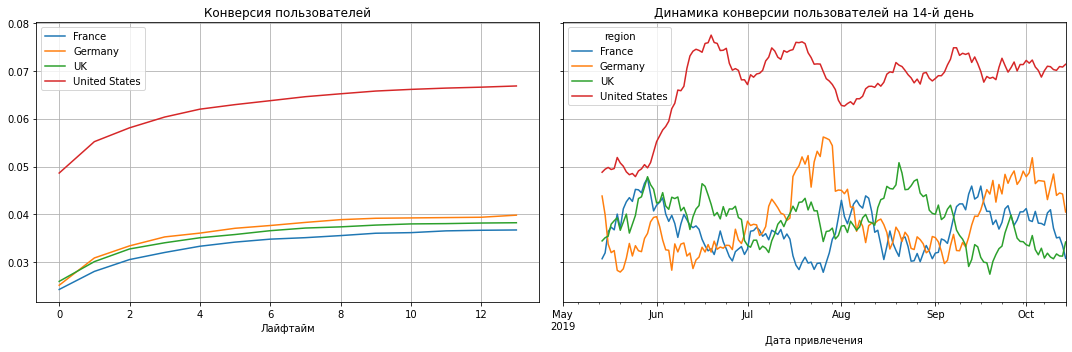

In [34]:
plot_conversion(conversion, conversion_in_time, analysis_horizon, window=14)

График конверсии подтверждает, что наилучшие показатели у пользователей из США - конверсия к концу второй недели в среднем превышает **6,5%**. Остальные регионы показывают конверсию ниже **4%**. Хуже всех конвертируются в покупателей пользователи из Франции. Пользователи из Германии показывют чуть более низкую конверсию в первый день в сравнении с британцами, но со второго дня обгоняют их по конверсии, достигая **4%** к концу второй недели.

График динамики конверсии указывает на определенную сезонность.

Конверсия 14го дня пользователей из США постепенно растет в исследуемом промежутке времени, поднимаясь с уровня в **5%** к уровню в **7%**. Видны участки плавного роста в начале каждого месяца с последующими резкими падениями в середине или в конце месяца.

Динамика конверсии пользователей из других стран имеет более хаотичное и разнонаправленное движения. Так конверсия ползователей из Германии колеблется в диапазоне от **3%** в середине мая, начале июня и начале сентября до **5,5%** во второй половине июля.

### Устройства пользователей

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [35]:
users_device = (
    profiles
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'audience'})
)
payers_device = (
    profiles
    .query('payer == True')
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'payers'})
)

device_conv = users_device.merge(payers_device, on='device', how='left')
device_conv['conversion%'] = device_conv['payers'] / device_conv['audience'] * 100
device_conv['conversion%'] = device_conv['conversion%'].round(2)
device_conv = device_conv.sort_values('conversion%', ascending=False).reset_index()
device_conv.style.background_gradient(cmap='GnBu')

,device,audience,payers,conversion%
0,Mac,30042,1912,6.360000
1,iPhone,54479,3382,6.210000
2,Android,35032,2050,5.850000
3,PC,30455,1537,5.050000


Из таблицы видно, что лидером по количеству пользователей, как платящих, так и неплатящих, выступает платформа iPhone. Однако наибольшую конверсию показывают пользователи платформы Mac, имеющей при этом наименьший общий охват аудитории. Аутсайдером по конверсии выступает ПК. 

Изучим показатели в динамике.

Горизонт анализа обозначим в две недели. Построим динамику конверсии на 14й день. Для адекватного отображения сгладим график динамики двухнедельной скользящей средней.

In [36]:
analysis_horizon = 14

In [37]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles, orders, max_date, analysis_horizon, dimensions=['device']
)

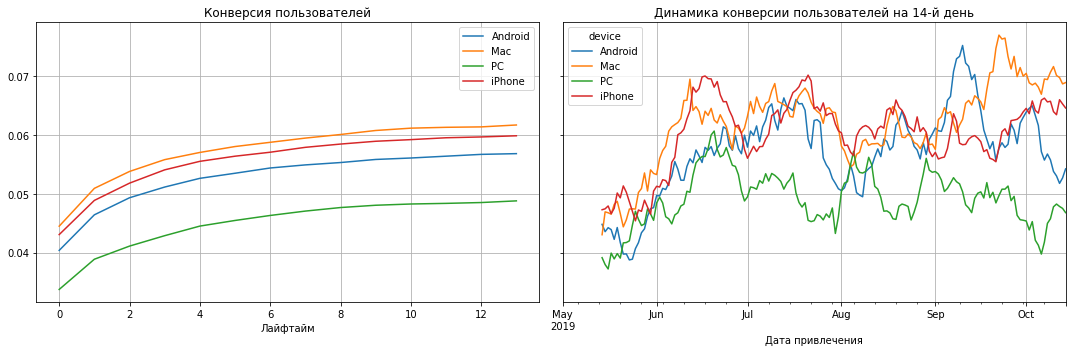

In [38]:
plot_conversion(conversion, conversion_in_time, analysis_horizon, window=14)

График конверсии подтверждает, что наилучшие показатели у пользователей `Mac` - их конверсия стабильно выше других платформ с первого дня использования приложения, и к концу второй недели в среднем превышает **6%**. Чуть хуже ведут себя аудитории `iPhone` и `Android`, отставая от аудитории `Mac` на доли процентов в течение всего первого 14-дневного периода пользования приложением. Наихудшую конверсию в первые 14 дней использования приложения показывают пользователи `ПК` с конверсией около **1%** в первый день и менее **5%** - в 14й.

Для платформ `Android`, `iPhone` и `Mac` динамика конверсии на 14 день показывает постепенный рост и относительно синхронные изменения на рассматриваемом промежутке времени. В начале мая средняя конверсия 14го дня по этим платформам составляла порядка **4,5%** и постепенно поднялась до уровня **6,5% - 7%**. Однако, средняя конверсия пользователей `Android` с середины сентября стремительно снижается, упав за месяц на **2%** - с пикового значения в **7,5%** к уровню в **5,5%**.

Конверсия пользователей `ПК`, по началу хорошо росшая вместе с другими платформами и достигшая уровня **6%** в середине июня, затем начала постепенно снижаться, достигнув к октябрю минимальной отметки в **4%** с последующим небольшим ростом.

### Каналы привлечения ползователей

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, графики и диаграммы, отражающую количество пользователей и долю платящих для каждого канала привлечения. 

In [39]:
users_channels = (
    profiles
    #.query('channel != "organic"')
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'audience'})
)
payers_channels = (
    profiles
    .query('payer == True')
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'payers'})
)

channels_conv = users_channels.merge(payers_channels, on='channel', how='left')
channels_conv['conv_percent'] = channels_conv['payers'] / channels_conv['audience'] * 100
channels_conv['conv_percent'] = channels_conv['conv_percent'].round(2)
channels_conv = channels_conv.sort_values('payers', ascending=False)
channels_conv

,audience,payers,conv_percent
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


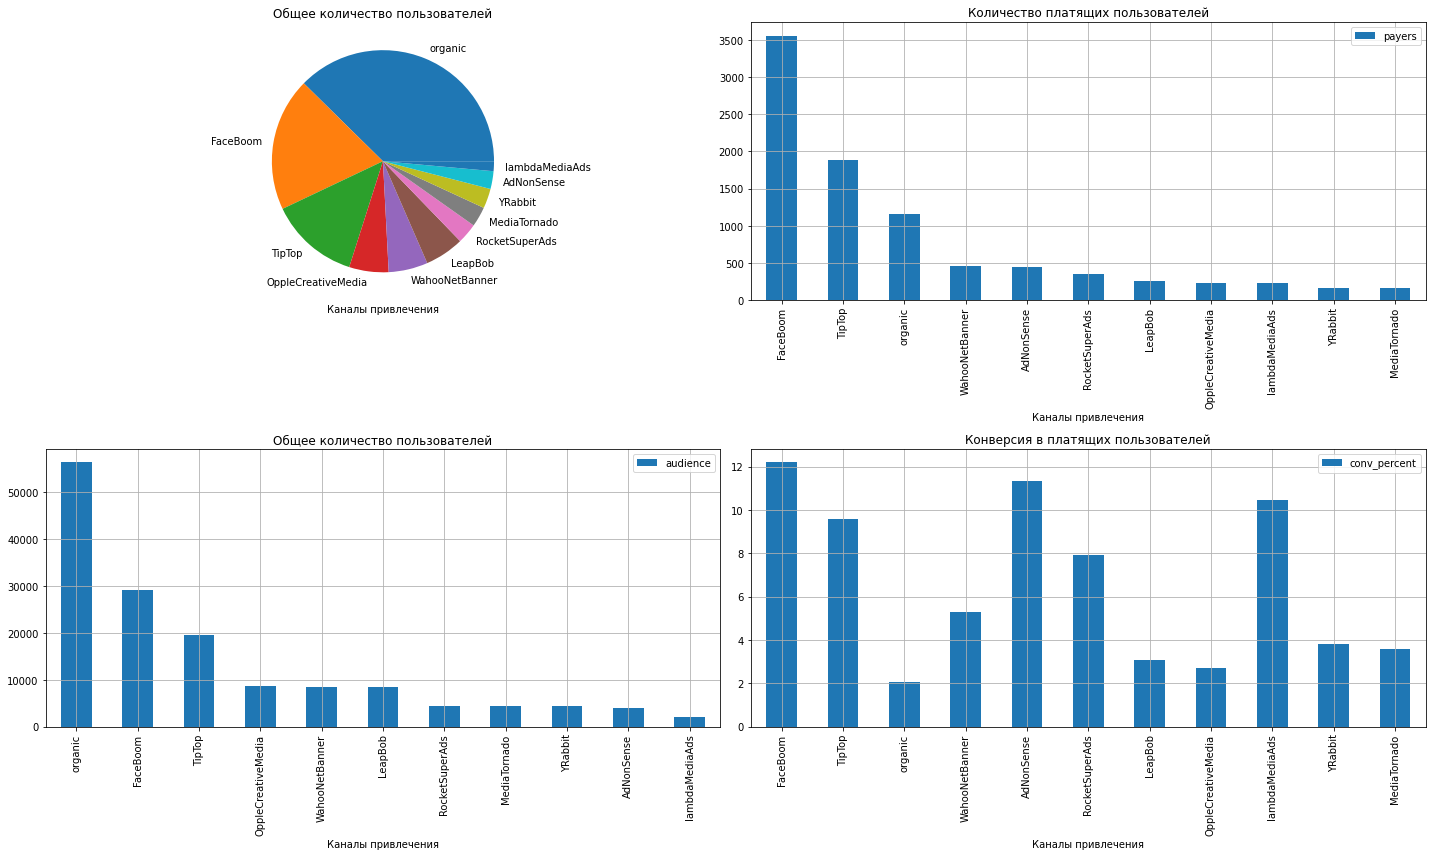

In [40]:
plt.figure(figsize=(20, 12))

(channels_conv
 .sort_values('audience', ascending=False)['audience']
 .plot(kind='pie', grid=True, ax=plt.subplot(2, 2, 1), rot=90)
)
plt.xlabel('Каналы привлечения')
plt.ylabel('')
plt.title('Общее количество пользователей')

(channels_conv
 .sort_values('audience', ascending=False)['audience']
 .plot(kind='bar', grid=True, ax=plt.subplot(2, 2, 3), rot=90)
)
plt.legend()
plt.xlabel('Каналы привлечения')
plt.title('Общее количество пользователей')

(channels_conv
 .sort_values('payers', ascending=False)['payers']
 .plot(kind='bar', grid=True, ax=plt.subplot(2, 2, 2), rot=90)
)
plt.legend()
plt.xlabel('Каналы привлечения')
plt.title('Количество платящих пользователей')

(channels_conv
 .sort_values('payers', ascending=False)['conv_percent']
 .plot(kind='bar', grid=True, ax=plt.subplot(2, 2, 4), rot=90)
)
plt.legend()
plt.xlabel('Каналы привлечения')
plt.title('Конверсия в платящих пользователей')

plt.tight_layout()
plt.show()

Из таблицы и графиков видно, что больше всего у приложения пользователей, пришедших через органический трафик (примерно треть от всей аудитории - более **56000**). Поэтому, несмотря на низкую конверсию, органический трафик дает третью по величине когорту платящих пользователей - боле **1000**).

Больше всего платящих пользователей (более **3500**) пришло через канал `FaceBoom`. Этот же канал показывает наилучшую конверсию - **12,2%**.

Следующий по количеству привлеченных платящих пользователей - `TipTop` (**1878**). Однако, по показателю конверсии он лишь четвертый - **9,6%**.

Остальные каналы платного трафика принесли примерно сопоставимое количество пользователей - менее **500** каждый.

При этом отличную конверсию показывают каналы `AdNonSense` - **11,34%** и `lambdaMediaAds` - **10,47%**. Так же хорошая конверсия у `RocketSuperAds` - **7,91%** и у `WahooNetBanner` - **5,3%**.Остальные каналы привлечения дают конверсию от **2,5%** до **4%**.

Изучим показатели в динамике.

Горизонт анализа обозначим в две недели. Построим динамику конверсии на 14й день. Для адекватного отображения сгладим график динамики двухнедельной скользящей средней.

In [41]:
analysis_horizon = 14

In [42]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles, orders, max_date, analysis_horizon, dimensions=['channel']
)

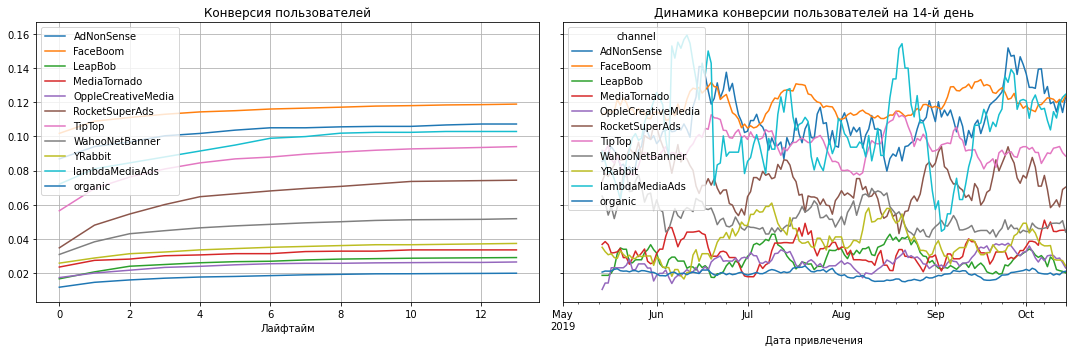

In [43]:
plot_conversion(conversion, conversion_in_time, analysis_horizon, window=14)

Чтбы не загромождать графики изучим отдельно каналы со средней конверсией более **5%** и меннее **5%**.

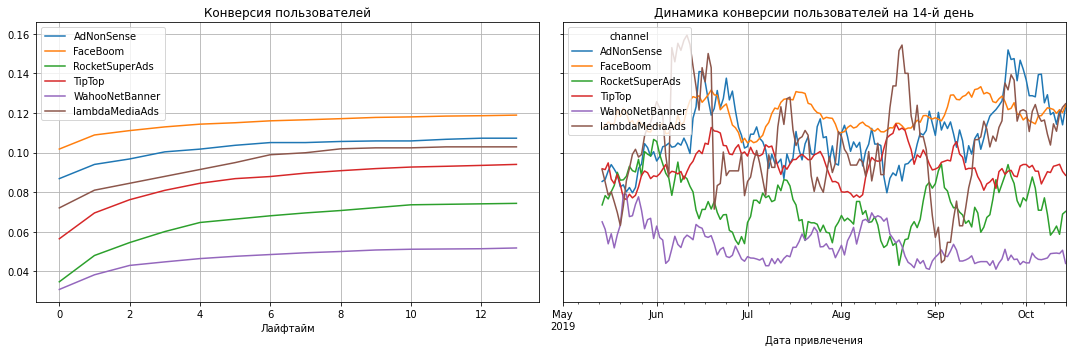

In [44]:
plot_conversion(
    (conversion[conversion.index.get_level_values(0)
                        .isin(list(channels_conv.query('conv_percent >= 5').index))]),
    (conversion_in_time[conversion_in_time.index.get_level_values(0)
                        .isin(list(channels_conv.query('conv_percent >= 5').index))]),
    analysis_horizon,
    window=14
)

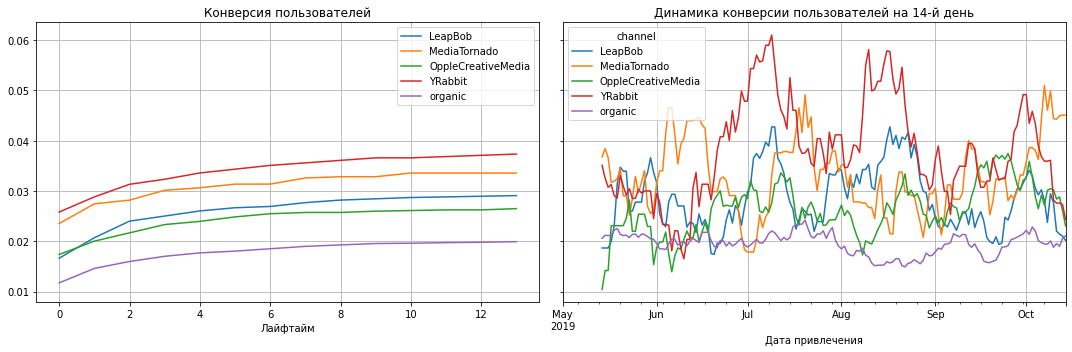

In [45]:
plot_conversion(
    (conversion[conversion.index.get_level_values(0)
                        .isin(list(channels_conv.query('conv_percent < 5').index))]),
    (conversion_in_time[conversion_in_time.index.get_level_values(0)
                        .isin(list(channels_conv.query('conv_percent < 5').index))]),
    analysis_horizon,
    window=14
)

Из графиков видно, что лучший канал по привлечению платящих клиентов - `FaceBoom` стабильно показывает хорошую конверсию на 14й день в диапазоне 11% - 13%.

Второй по велчине конверсии канал - `AdNonSense` показывает менее стабильную динамику. Конверсия этого канала поднялась с 8% в середине мая до 14% в середине июня, затем снова упала до 8% к середине августа и поднялась до 15% к середине сентября с последующим снижением до 12% к середине октября.

Третий по средней конверсии канал `lambdaMediaAds` показывает самую нестабильную динамику, колеблясь между 4,5% и 16%. Наихудший показатель конверсии по этому каналу был в период с конца августа до середины сентября. Наилучшую конверсию этот канал показывал в начале июня и середине августа. Стоит изучить подробнее рекламные кампании этих периодов.

Второй по числу платных пользователей канал `TipTop` является лишь четвертым по конверсии и стабильно обеспечивает конверсию в платящих клиентов на 14й день в диапазоне от 8% до 11%.

Каналы `RocketSuperAds` и `WahooNetBanner` показывают среднюю конверсию ниже 8% и ниже 6% соответственно. При этом конверсия 14го дня `WahooNetBanner` имеет отрицательную динамику, постепенно снижаясь к уровню в 4,5%.

Остальные каналы дают среднюю конверсию на 14й день ниже 4%. Однако, можно подробнее изучить рекламные кампании в канале `YRabbit` в начале июля и середине августа, так как в эти периоды конверсия поднималась до 6%. Также можно отметить постепенный рост конверсии в канале `MediaTornado` в последние полтора месяца с 2% до 4,5%. Возможно, у канала есть потенциал дальнейшего роста.

## Анализ маркетинга

Оценим расходы компании на привелчение ползователей в общем и в разрезе источников трафика.

### Общая сумма расходов на маркетинг

Посчитайте общую сумму расходов на маркетинг и распределение трат по рекламным источникам.

In [46]:
total_costs = costs['costs'].sum()

print('Общая сумма рсходов на рекламу составила {}$'.format(round(total_costs, 2)))

Общая сумма рсходов на рекламу составила 105497.3$


In [47]:
report = (
    costs
    .groupby('channel')
    .agg({'costs': 'sum'})
    .sort_values('costs', ascending=False)
)
report['costs_percent'] = round(report['costs'].div(total_costs) * 100, 2)

report

,costs,costs_percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Общая сумма рсходов на маркетинг составила `105497,3$`. Более половины этой суммы (`54751,3$`) было потрачено на `TipTop`, примерно треть (`32445,6$`) - на `FaceBoom`. На `WahooNetBanner` и `AdNonSense` было потрачено в совокупности около `9%` бюджета - по `5151$` и `3911,25$` на каждый соответственно. На остальные каналы в совокупности было потрачено менее `10%` бюджета.

### Динамика расходов во времени

Визуализируем динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [48]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = costs['dt'].astype('datetime64[M]')

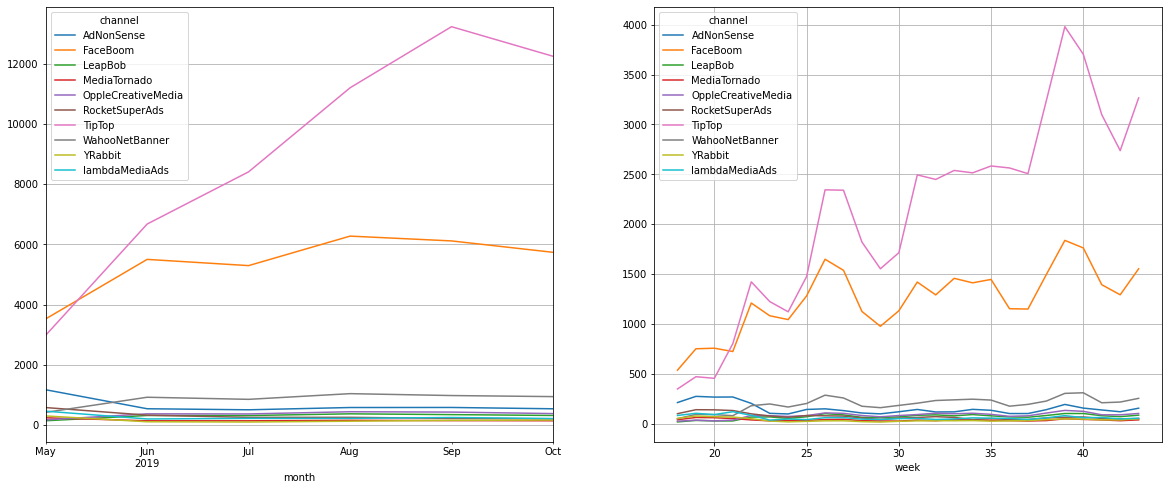

In [49]:
plt.figure(figsize=(20, 8))

report = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
report.T.plot(ax=plt.subplot(1, 2, 1), grid=True)

report = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
report.T.plot(ax=plt.subplot(1, 2, 2), grid=True)

plt.show()

Графики указывают на постепенный рост расходов на каналы `TipTop` и `FaceBoom` от месяца к месяцу. За рассматриваемый пеирод месячные расходы на эти каналы выросли с `3000$` до `12000$` (`TipTop`) и до `6000$` (`FaceBoom`). При этом рост расходов на канал `TipTop` наблюдается на всем рассматриваемом промежутке времени. На канал `FaceBoom` расходы росли с мая по июнь, затем стабилизировались на уровне около `1500$` в неделю. Расходы на остальные каналы стабильны во времени и находятся на уровне менее `500$` в неделю.

### Расчет среднего CAC для источников трафика

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [50]:
cac = profiles.query('channel != "organic"')['acquisition_cost'].mean()
print('Средний CAC - {}$'.format(round(cac, 2)))

Средний CAC - 1.13$


In [51]:
cac_report = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values('cac', ascending=False)
)
cac_report

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Средняя стоимость привлечения одного плятящего клиента составляет `1,13$`.

При этом средний CAC для канала `TipTop` в 2,5 раза превышает это значение и составляет `2,78$`.

`FaceBoom` и `AdNonSense` дают CAC сопоставимый со средним значением. Клиенты, привлекаемые через остальные каналы, обходятся компании значительно дешевле среднего.

На этом месте можно было бы закончить, написав, что причина неудач в сливе половины рекламного бюджета на неэффективное продвижение в `TipTop`. Но мы же настоящие аналитики, поэтому будем копать дальше.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. За дату анализа примем 1 ноября 2019 года, а в качестве горизонта анализа возьмем 14 дней, така как в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Сфокусируемся на анализе платного привлечения и исключим органических пользователей из расчетов.

In [52]:
obs_date = pd.to_datetime('2019-11-01')
analysis_horizon = 14
profiles_adv = profiles[profiles['channel'] != 'organic']

### Анализ общих LTV, CAC и ROI

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [53]:
raw_data, ltv, ltv_history, roi, roi_history = get_ltv(profiles_adv, orders, obs_date, analysis_horizon)

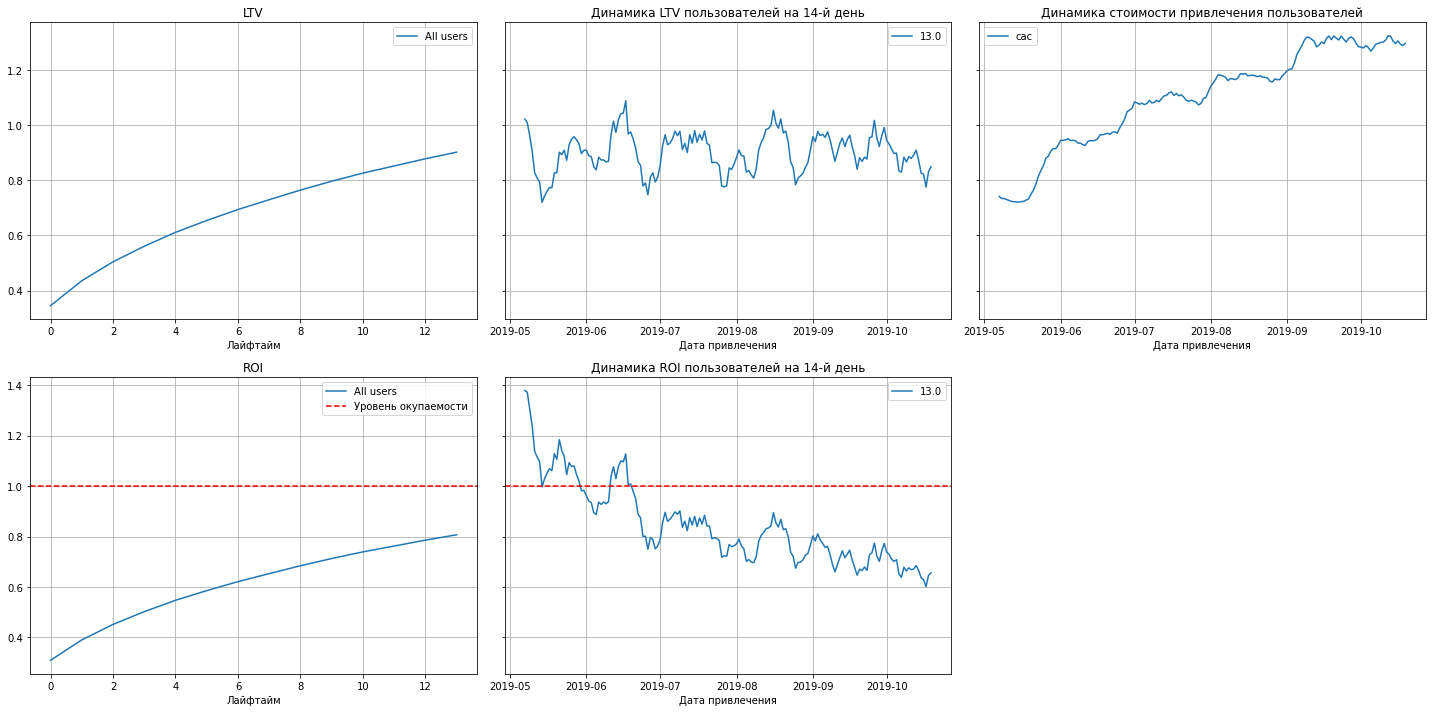

In [54]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon)

Из графиков следует, что маркетинговые вложения не окупается с начала июня. Средний LTV на 14й день находится в диапазоне от `0,8$` до `1$` при среднем CAC в `1,13$`.  При этом динамика сотимости привлечения пользователей показывает активный рост с `0,75$` за пользователя в середине мая до `1,25$` к середине сентября. Это привело к постепенному снижению ROI со `140%` до `60%`.

### Анализ конверсии и удержания пользователей

Проверим конверсию пользователей и динамику её изменения, а также удержание пользователей. Построим и изучим графики конверсии и удержания.

In [55]:
raw_data, conversion, conversion_history = get_conversion(profiles_adv, orders, obs_date, analysis_horizon)

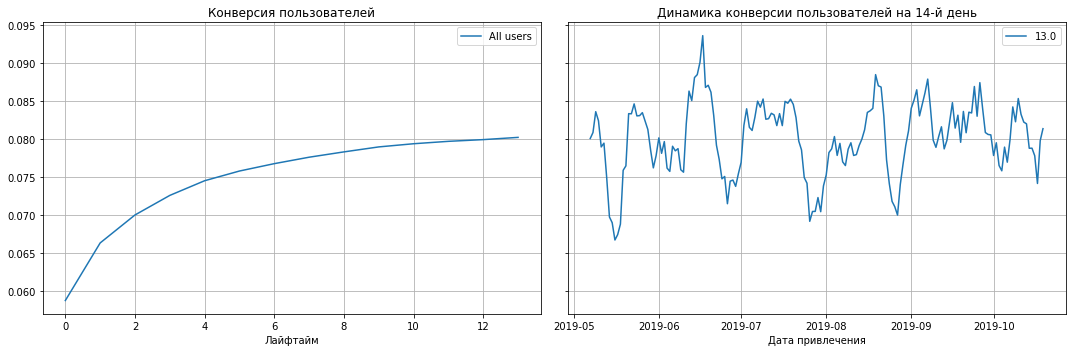

In [56]:
plot_conversion(conversion, conversion_history, analysis_horizon)

In [57]:
raw_data, retention, retention_history = get_retention(profiles, visits, obs_date, analysis_horizon)

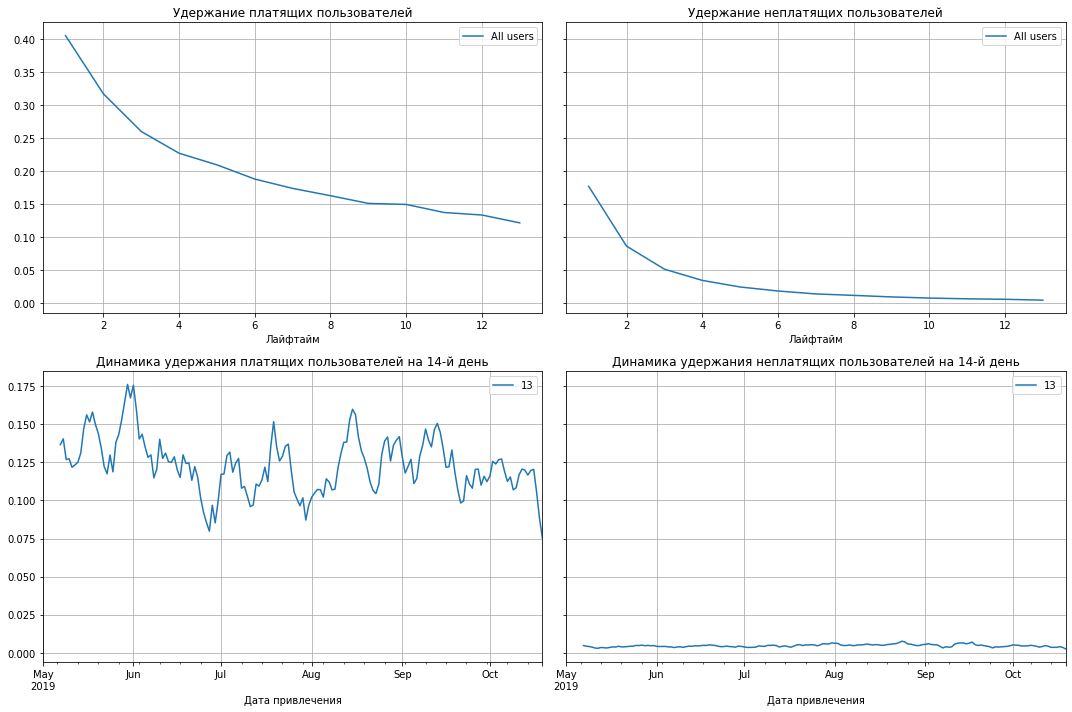

In [58]:
plot_retention(retention, retention_history, analysis_horizon)

Из графика конверсии видно, что к концу второй недели в среднем 8% пользователей, привлеченных через платные каналы, конвертируются в покупателей. При этом динамика конверсии иммет выраженную сезонность и колеблется от 7% до 9%.

Удержание платящих пользователей находится в диапазоне от 10% до 15% с незначительной тенденцией к снижению.

### Анализ удержания в разбивке по странам, устройствам и каналам

Проверим удержание пользователей и ее динамику с разбивкой по странам, устройствам и каналам. Построим и изучим графики удержания.

Графики удержания пользователей и динамики удержания в разбивке по географии


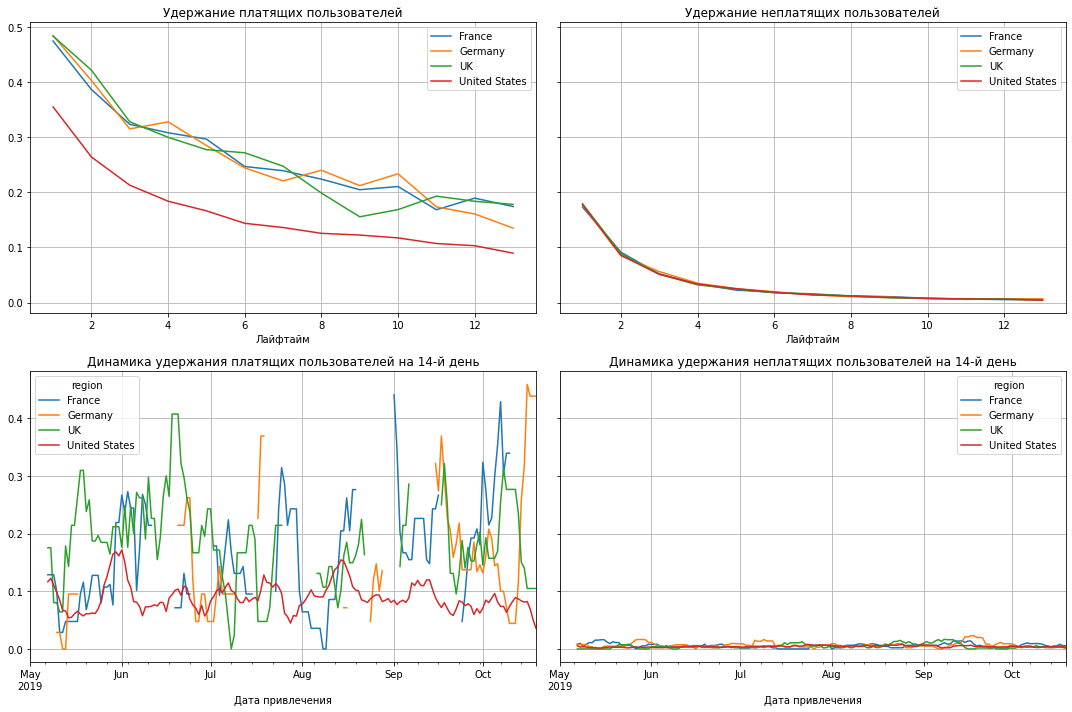

Графики удержания пользователей и динамики удержания в разбивке по устройствам


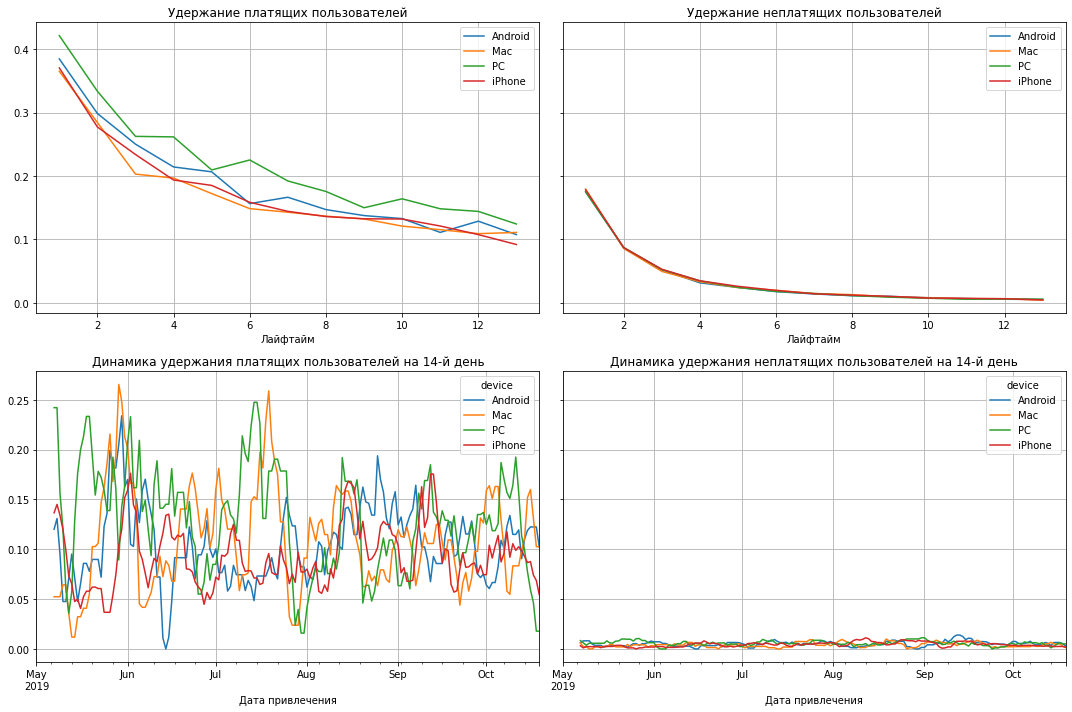

Графики удержания пользователей и динамики удержания в разбивке по каналам привлечения


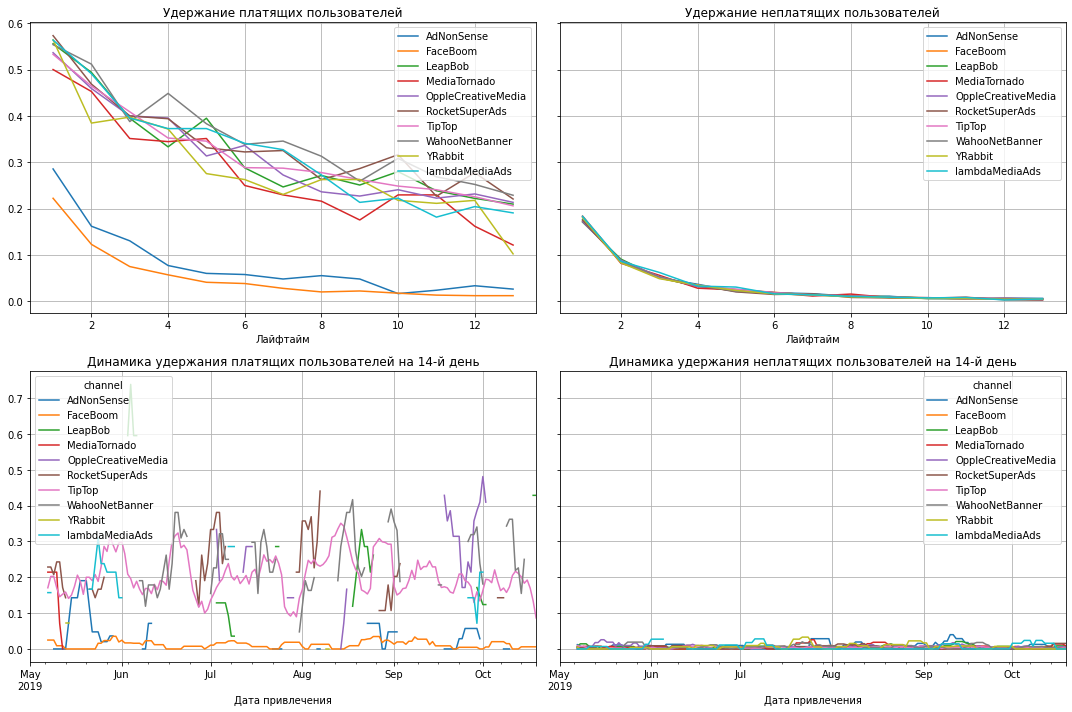

In [59]:
dims_dict = {'region': 'географии', 'device': 'устройствам', 'channel': 'каналам привлечения'}

for dim in ['region', 'device', 'channel']:
    print('Графики удержания пользователей и динамики удержания в разбивке по {}'.format(dims_dict[dim]))
    raw_data, retention, retention_history = get_retention(profiles_adv, 
                                                           visits,
                                                           obs_date,
                                                           analysis_horizon,
                                                           dimensions=[dim])
    plot_retention(retention, retention_history, analysis_horizon)

Платящие пользователи из США показывают более высокую конверсию, но при этом более низкое удержание, чем пользователи из других регионов, и показывает стабильную динамику на уровне `10%` к 14му дню. Динамика удержания платящих пользователей из других регионов имеет ярко выраженную сезонность и колеблется в большом диапазоне, в том числе, опускаясь до нуля в некоторых 14-дневных промежутках, о чем говорят разрывы в сглаженном графике динамики.

Удержание не зависит от устройства пользователя. ПОльзователи ПК показывают чуть более высокий коэффициент удержания в срвнении с пользователям других платформ. При этом динамика удержания на 14й день показывает очень сильный разброс в широком диапазоне от `0` до `25%`.

Платящие пользователи, пришедшие через `FaceBoom`, стабильно показывают околонулевой уровень удержания на 14й день. Удержание платящих пользователей, пришедших через `AdNonSense` не многим лучше. Остальные каналы в среднем показывают более высокий уровень удержания - примерно в два раза выше.

### Анализ LTV, CAC и ROI в разбивке по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [60]:
raw_data, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_adv, orders, obs_date, analysis_horizon, dimensions=['device']
)

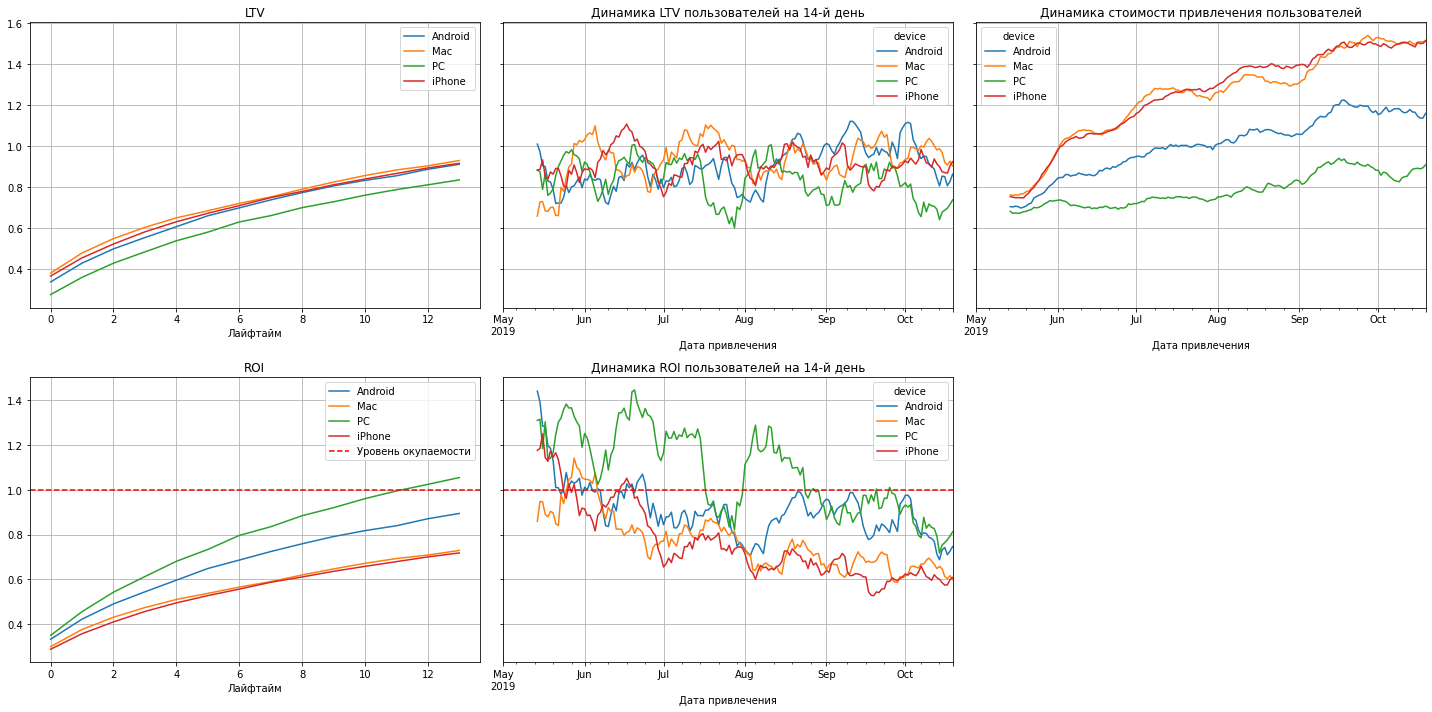

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

Показатель LTV у пользователей `Android`, `Mac` И ,`iPhone` в среднем близки и равны `0,9$`. Средний LTV пользователей `PC` чуть хуже и находится на уровне `0,85$`. При этом из всех платформ только `PC` в среднем показывает окупаемость. Однако, судя по графику динамики ROI, с конца августа и пользователи `PC` перестали окупаться. В то время как привлечение пользователей мобильных устройств окупалось только в мае, а пользователей `Mac` не окупалось практически никогда.

Причиной этого служат растущие расходы на привлечение пользователей всех платформ при сохранении среднего LTV. В особенности, фанатов `Apple`.

### Анализ LTV, CAC и ROI в разбивке по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [62]:
raw_data, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_adv, orders, obs_date, analysis_horizon, dimensions=['region']
)

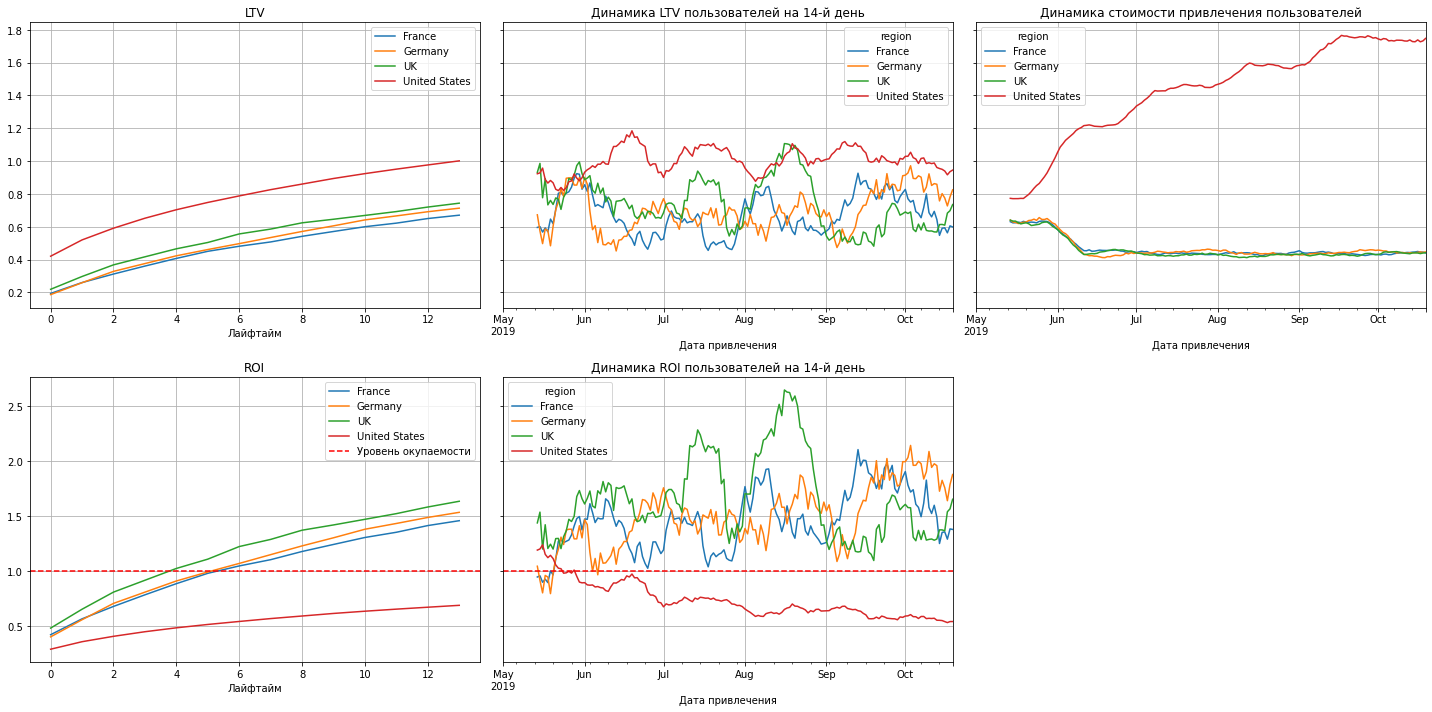

In [63]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

Самыми доходными оказались клиенты из `Unated States` со стабильным средним LTV около `1$`. Однако, стоимость привлечения этих клиентов все время растет и с уровня `0,8$` поднялась до `1,7$`. Тем самым ROI американцев упал ниже уровня окупаемости еще в мае, и там и остался.

Расходы на привлечение клиентов из остальных стран стабильно окупаются, не смотря на низких LTV (менее `8$`) и благодаря низким затратам на маркетинг (менее `0,5$`), давая таким образом средний ROI около `150%`.

Отдельно стоит обратить внимание на рекламные кампании, проводившиеся для пользователей из `UK` в первой половине июля и первой половине августа, так как в эти периоды ROI этих пользователей был максимальным (более `200%`).

### Анализ LTV, CAC и ROI в разбивке по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [64]:
raw_data, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_adv, orders, obs_date, analysis_horizon, dimensions=['channel']
)

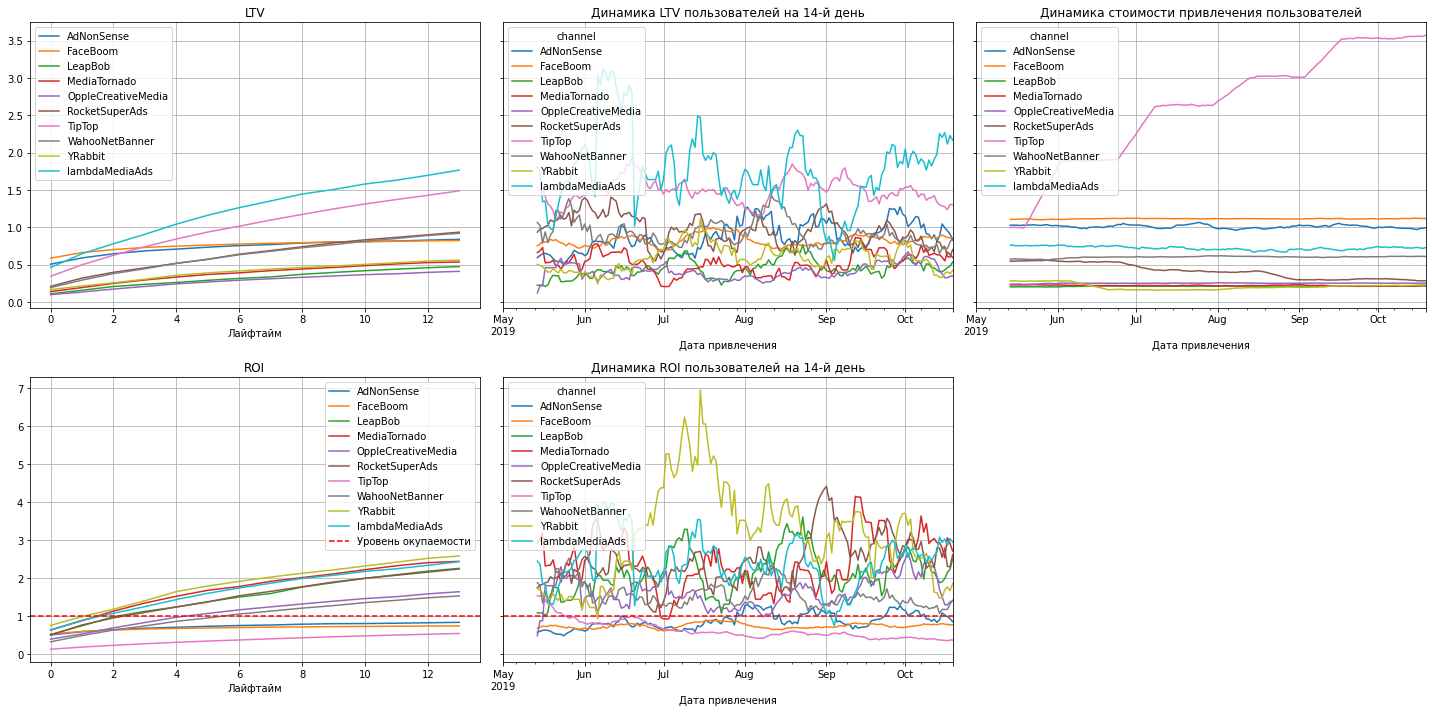

In [65]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

Наилучший LTV показывают пользователи, привлеченные через `lambdaMediaAds`. Они же входят и в ТОП по ROI.

Вторым по LTV идет `TipTop`, однако его ROI не дотягивает даже до уровня окупаемости из-за огромных расходов на продвиженме, превышающих в несколько раз расходы на привлечение через другие каналы.

Это подтверждает предположение, выдвинутую при анализе маркетинга, о том, что причина неудач в сливе половины рекламного бюджета на неэффективные кампании в `TipTop`.

Так же стоит отметить, что до уровня окупаемости не дотягивают `AdNonSense` и `FaceBoom`. LTV пользователей из `FaceBoom` всегда (а пользователей из `AdNonSense` почти всегда) ниже их CAC.

При этом каналы `YRabbit`, `MediaTornado` и `LeapBob` дают наибольший ROI (более `200%`) и, не смотря на невысокий LTV, могут дать хорошиие возможности для роста аудитории при увеличении расходов на эти каналы.

### Выводы по анализу метрик

Графики показывают, что в целом рекламные затраты на привлечение пользователей не окупаются.

Наихудшее влияние на окупаемость оказывает реклама:
- для владельцев продукции `Apple` (`Mac` и `iPhone`),
- для пользователей из `Unated States`,
- в `TipTop`, `FaceBoom`, `AdNonSense`.


Возможные причины неудач:
1. Проблемы в работе приложения под `iOS` и `MacOS` или неэффективная реклама для них - рост расходв на рекламу не приводит к росту ROI в этих когортах. Следует изучить дополнительную информацию о ссесиях пользователей для выявления возможных технических проблем и пересмотреть рекламные кампании для пользователей этих устройств.
2. Неэффективная реклама для пользователей из США. Увеличение расходов на рекламу в этом регионе не приводит к росту LTV пользователей. Следует пересмотреть портрет ЦА или рекламные креативы. 
3. Высокие расходы на рекламу в `TipTop`, неэффективная реклама в `TipTop`, `FaceBoom` и `AdNonSense`, высокая стоимость привлечения пользователей из этих каналов. Следует пересмотреть в первую очередь рекламу в `TipTop`, так как она дает наиболее сильный отрицательный эффект на окупаемость всего маркетинга.
4. Незаслуженно обделенный вниманием канал `lambdaMediaAds`, показывающий отличный LTV и ROI. Возможно, стоит изучить рекламмные кампании этого канала и распространить их на другие каналы.

## Итоги анализа и общие выводы

Анализ помог выявить причины отсутствия окупаемости маркетинговых расходов на привлечение клиентов.

Главной причиной неэфективности маркетинга можно назвать ошибочный упор на рекламу в одном канале `TipTop`, куда было потрачено более половины рекламного бюджета. Следует пересмотреть распределение рекламного бюджета между каналами. Отдельное внимание стоит уделить каналу `lambdaMediaAds`, дающему отличную конверсию и наибольший LTV клиентов. Стоит изучить рекламмные кампании этого канала и, возможно, распространить их на другие каналы. Также стоит обратить внимание на `YRabbit`, `MediaTornado` и `LeapBob`, которые дают наибольший ROI (более 200%) и, не смотря на невысокий LTV и низкую конверсию, могут обеспечить рост доходов при увеличении охвата аудитории в них за счет увеличения рекламных расходов.

Второй ошибкой было делать акцент на пользователей из США и привлечение через `FaceBoom`, так как, не смотря на высокие конверсии для обозначенных когорт, удержание в них очень низуое, и средний LTV не обеспечивает окупаемость вложений в рекламу. Стоит так же либо пересмотреть распределение расходов между регионами, либо пересмотреть рекламные креативы, чтобы  стимулировать пользователей из этих когорт продолжать совершать покупки в приложении и поддерживать удержание на более высоком уровне.

Последняя проблема - низкий LTV и отсутствие окупаемости рекламы для пользователей продукции `Apple` (платформы `iPhone` и `Mac`). Данный вопрос следует изучать глубже, так как причина может крыться не только в маркетинге, но и в технических проблемах.